In [1]:
from google.cloud import vision
from google.cloud.vision import types
import io
from PIL import Image, ImageDraw
from enum import Enum

In [2]:
secret_path =  "secret/googleServiceAcc.json"

In [24]:

image_file='resource/sample_doc.png'
image_file='resource/sample_doc_r.png'
image_file='resource/doc01BW.jpg'
image_file='resource/doc01zoom.png'
image_file='resource/doc01zoomH.png'
image  = Image.open(image_file)

In [26]:
client = vision.ImageAnnotatorClient.from_service_account_json(secret_path)
with io.open(image_file, 'rb') as image_file1:
        content = image_file1.read()
content_image = types.Image(content=content)

In [27]:
#API Call
response = client.document_text_detection(image=content_image)
document = response.full_text_annotation

In [28]:
print(document.text)

มนอ. -
11 .
เจ้าของรถ
วันที่ครอบครองรถ
11 มิถุนายน 2562
19 เมษายน 2537
สัญชาติ
สัญชาติ
ไทย
ไทย
ลำดับที่ 1
ผู้ถือกรรมสิทธิ์ นายสมบูรณ์ พรหมกระบิล
เลขที่บัตร 1479900233781
วันเกิด
ที่อยู่ 232/42 หมู่ 9 )
ต.โพธิ์กลาง อ. เมือง นครราชสีมา
ผู้ครอบครอง
วันเกิด
เลขที่บัตร
สัญชาติ
ที่อยู่
โทร.
สัญญาเช่าซื้อเลขที่
ลงวันที่
โทร.



In [7]:
class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5
def draw_boxes(image, bounds, color,width=5):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        draw.line([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y,
            bound.vertices[0].x, bound.vertices[0].y],fill=color, width=width)
    return image

def get_document_bounds(response, feature):
    bounds=[]
    for i,page in enumerate(document.pages):
        for block in page.blocks:
            if feature==FeatureType.BLOCK:
                bounds.append(block.bounding_box)
            for paragraph in block.paragraphs:
                if feature==FeatureType.PARA:
                    bounds.append(paragraph.bounding_box)
                for word in paragraph.words:
                    for symbol in word.symbols:
                        if (feature == FeatureType.SYMBOL):
                            bounds.append(symbol.bounding_box)
                    if (feature == FeatureType.WORD):
                        bounds.append(word.bounding_box)
    return bounds

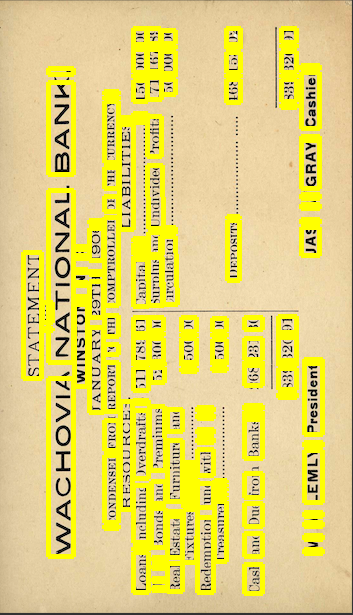

In [9]:
bounds = get_document_bounds(response, FeatureType.WORD)
draw_boxes(image, bounds, 'yellow')